In [ ]:
#importing the dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2 as cv
from PIL import Image
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
from tensorflow.keras import layers, models , Sequential
from tensorflow.keras.layers import Conv2D , MaxPooling2D , Dropout , Dense , Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator as dag
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix

The dataset link is: https://www.kaggle.com/datasets/khoongweihao/covid19-xray-dataset-train-test-sets/data

Download it, decompress it and place the xray_dataset_covid19 folder containing the train and test images in the same folder as this file

In [5]:
path = os.getcwd()
print(os.listdir(path))

['.DS_Store', 'archive', 'xray_dataset_covid19', 'data_analysis.ipynb', 'archive.zip', 'archive (1).zip']


In [6]:
path = os.path.join(path, 'xray_dataset_covid19')
print(os.listdir(path))

['test', 'train']


In [10]:
df_train = (os.path.join(path, "test"))
df_test = (os.path.join(path,"test"))

In [11]:
os.listdir(df_train)


['PNEUMONIA', 'NORMAL']

In [12]:
os.listdir(df_test)

['PNEUMONIA', 'NORMAL']

test
---> PNEUMONIA
------> SARS-10.1148rg.242035193-g04mr34g05x-Fig5-day9.jpeg


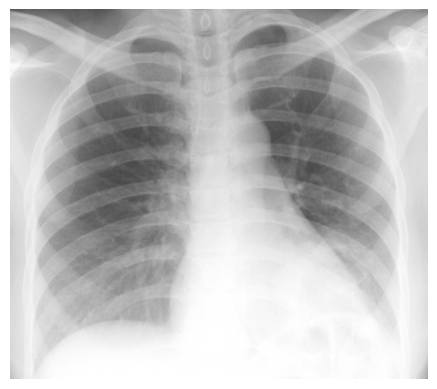

------> SARS-10.1148rg.242035193-g04mr34g09a-Fig9a-day17.jpeg


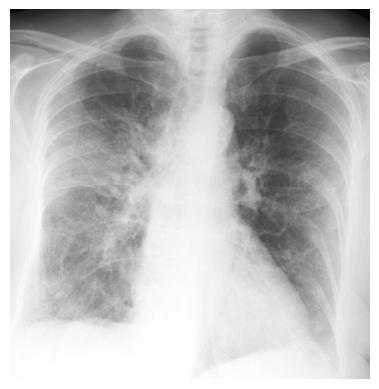

------> SARS-10.1148rg.242035193-g04mr34g0-Fig8a-day0.jpeg


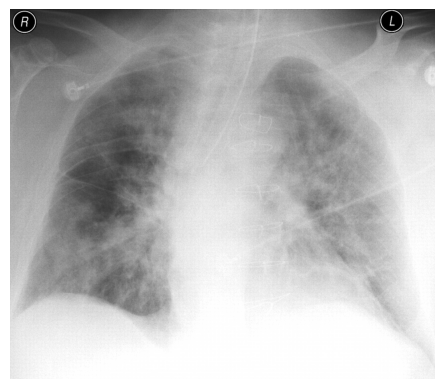

------> streptococcus-pneumoniae-pneumonia-1.jpg


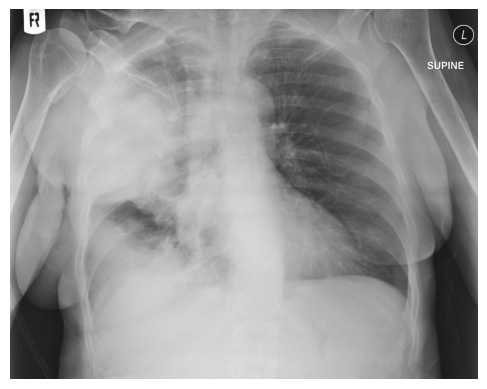

------> SARS-10.1148rg.242035193-g04mr34g04a-Fig4a-day7.jpeg


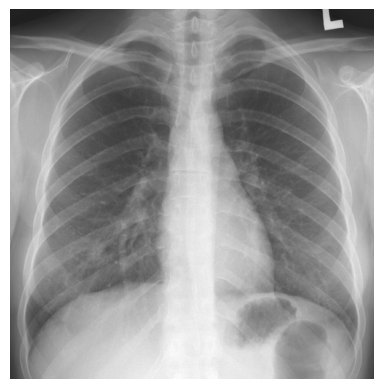

------> ryct.2020200034.fig5-day4.jpeg


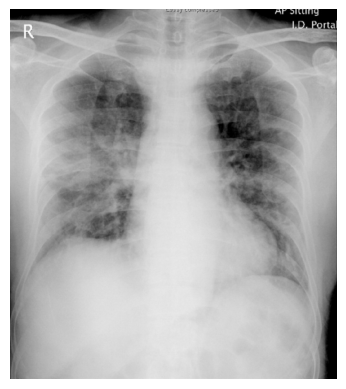

------> SARS-10.1148rg.242035193-g04mr34g0-Fig8b-day5.jpeg


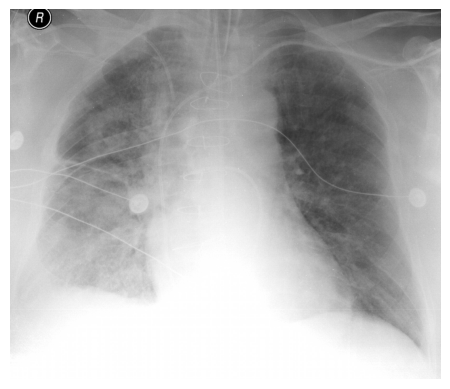

------> SARS-10.1148rg.242035193-g04mr34g09c-Fig9c-day27.jpeg


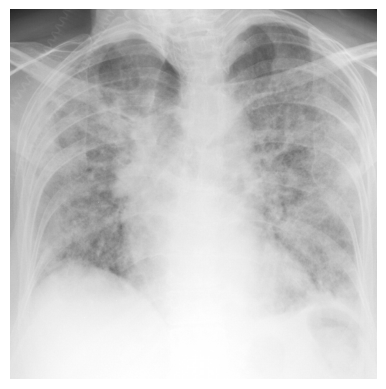

------> SARS-10.1148rg.242035193-g04mr34g0-Fig8c-day10.jpeg


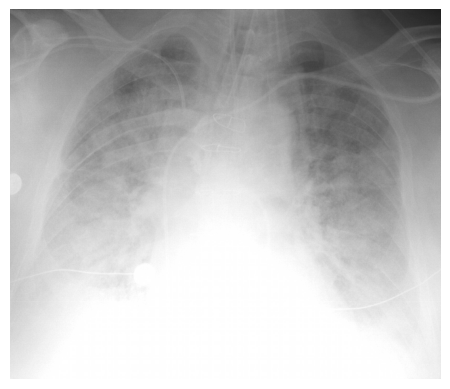

------> streptococcus-pneumoniae-pneumonia-temporal-evolution-1-day1.jpg


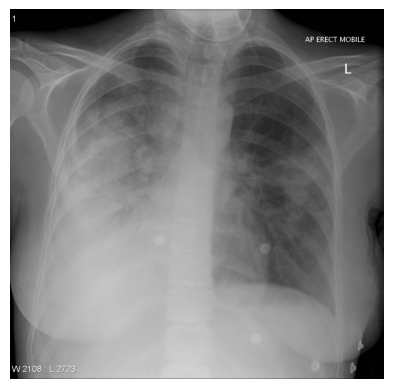

------> streptococcus-pneumoniae-pneumonia-temporal-evolution-1-day0.jpg


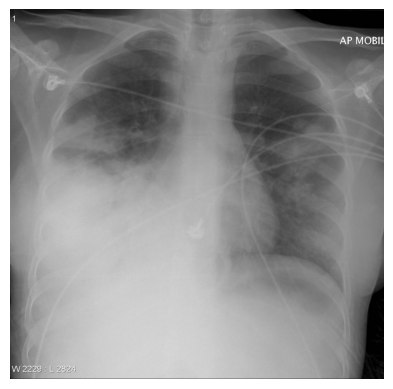

------> streptococcus-pneumoniae-pneumonia-temporal-evolution-1-day2.jpg


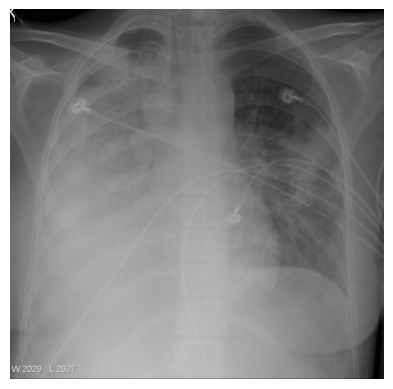

------> ryct.2020200034.fig5-day7.jpeg


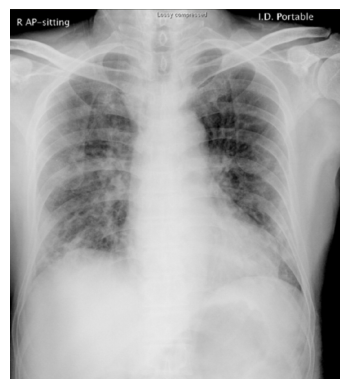

------> streptococcus-pneumoniae-pneumonia-temporal-evolution-1-day3.jpg


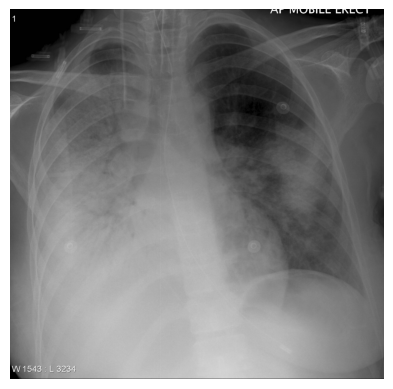

------> SARS-10.1148rg.242035193-g04mr34g07a-Fig7a-day5.jpeg


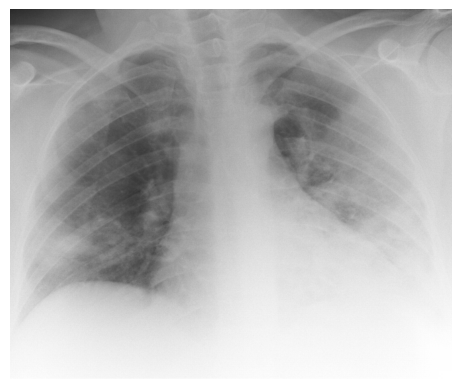

------> SARS-10.1148rg.242035193-g04mr34g07b-Fig7b-day12.jpeg


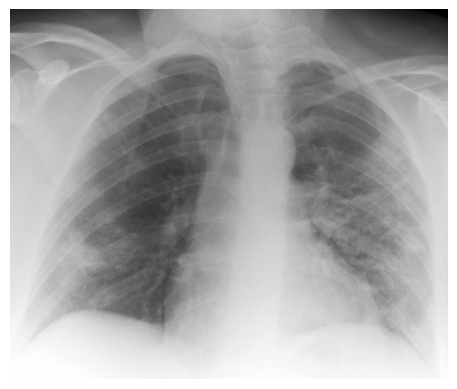

------> SARS-10.1148rg.242035193-g04mr34g04b-Fig4b-day12.jpeg


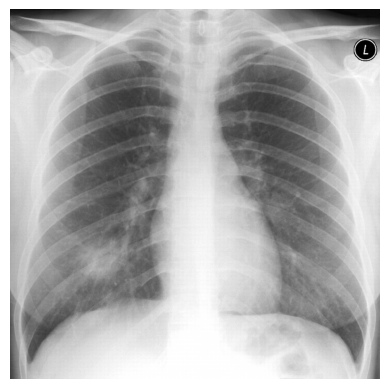

------> ryct.2020200034.fig5-day0.jpeg


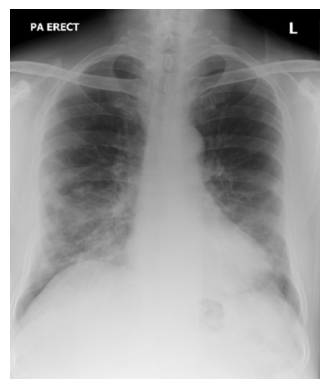

------> ryct.2020200034.fig2.jpeg


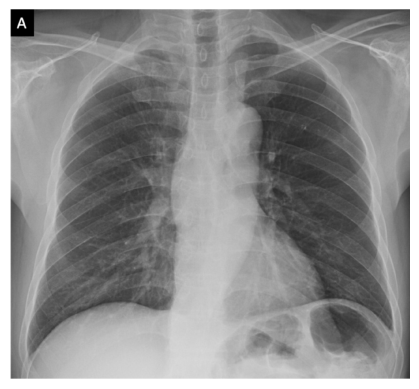

------> SARS-10.1148rg.242035193-g04mr34g09b-Fig9b-day19.jpeg


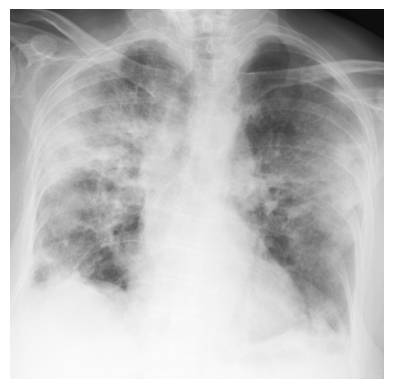

---> NORMAL
------> NORMAL2-IM-0123-0001.jpeg


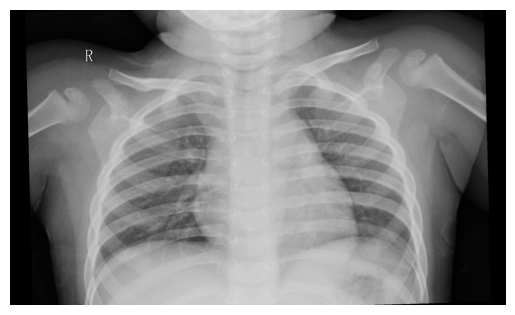

------> NORMAL2-IM-0131-0001.jpeg


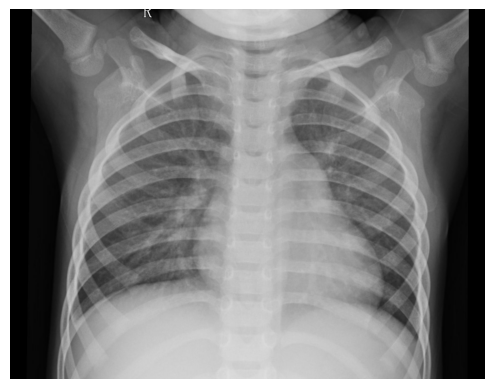

------> NORMAL2-IM-0110-0001.jpeg


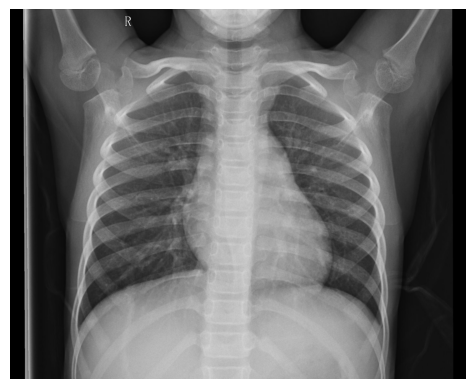

------> NORMAL2-IM-0092-0001.jpeg


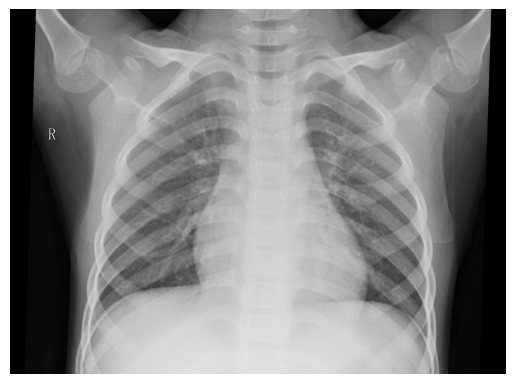

------> NORMAL2-IM-0035-0001.jpeg


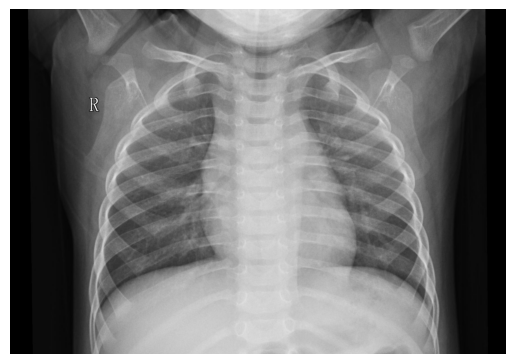

------> NORMAL2-IM-0117-0001.jpeg


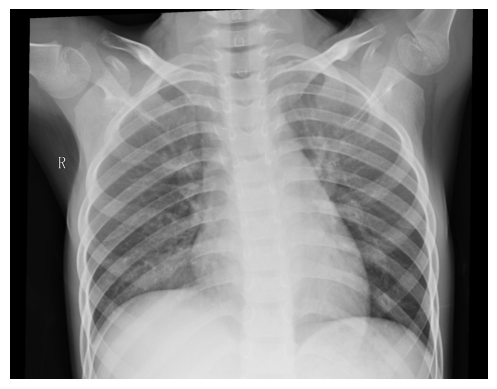

------> NORMAL2-IM-0130-0001.jpeg


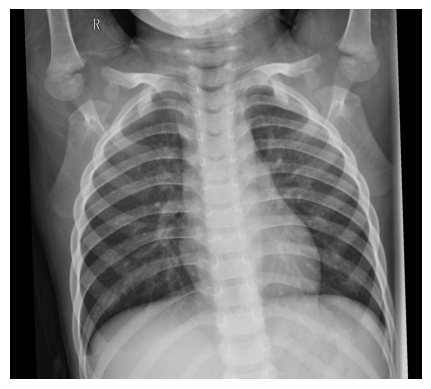

------> NORMAL2-IM-0105-0001.jpeg


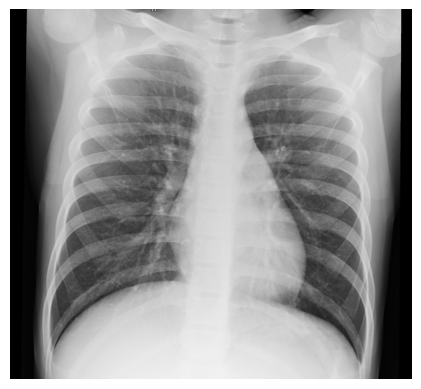

------> NORMAL2-IM-0111-0001.jpeg


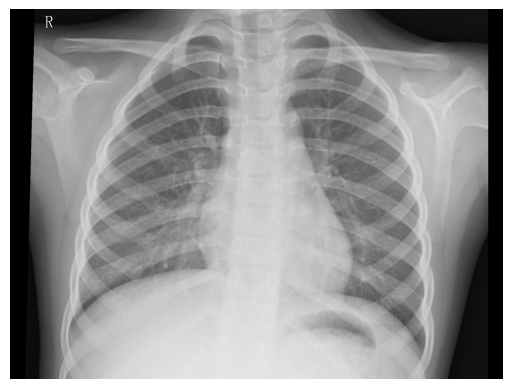

------> NORMAL2-IM-0073-0001.jpeg


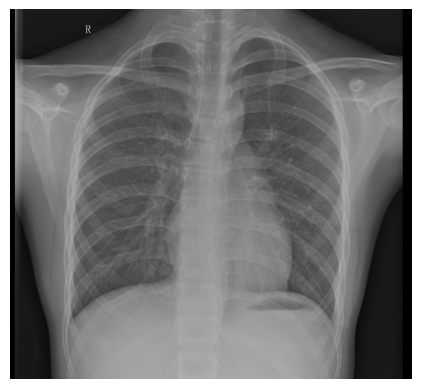

------> NORMAL2-IM-0052-0001.jpeg


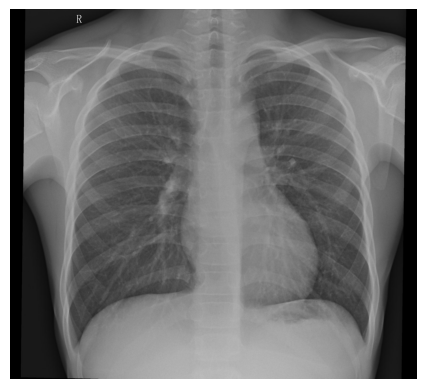

------> NORMAL2-IM-0112-0001.jpeg


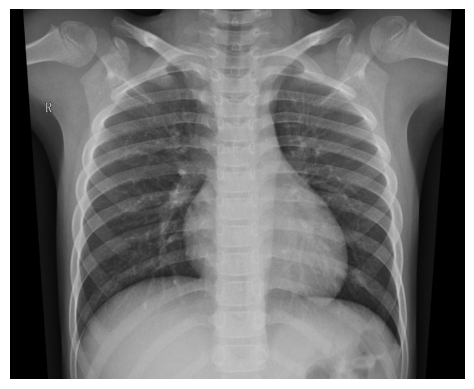

------> NORMAL2-IM-0059-0001.jpeg


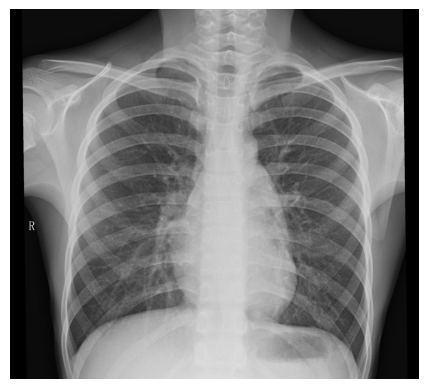

------> NORMAL2-IM-0171-0001.jpeg


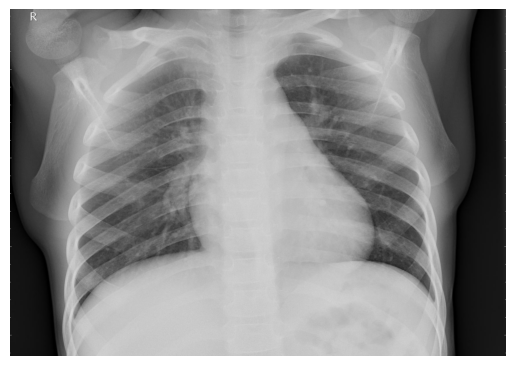

------> NORMAL2-IM-0072-0001.jpeg


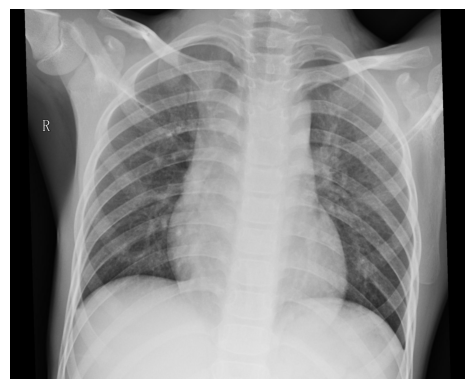

------> NORMAL2-IM-0120-0001.jpeg


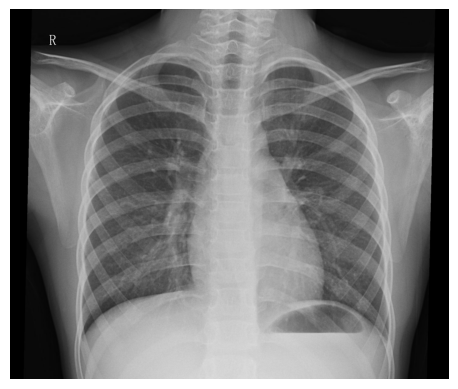

------> NORMAL2-IM-0139-0001.jpeg


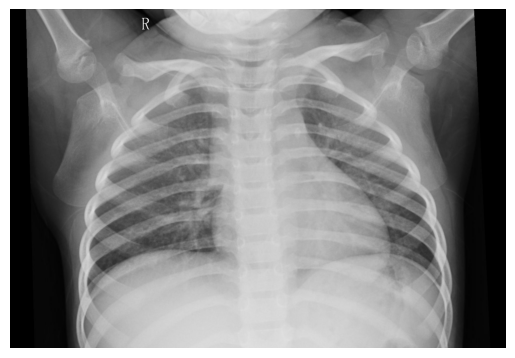

------> NORMAL2-IM-0132-0001.jpeg


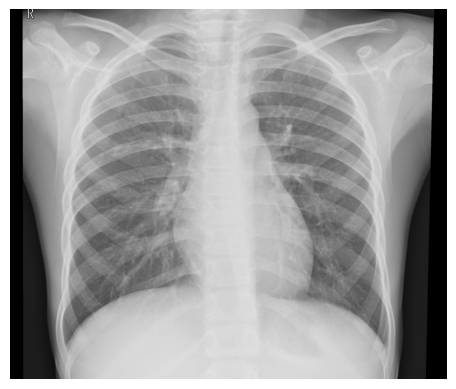

------> NORMAL2-IM-0058-0001.jpeg


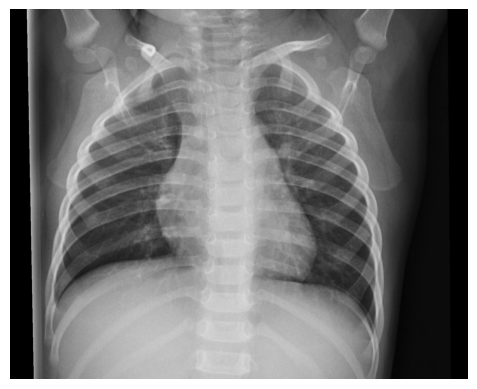

------> NORMAL2-IM-0145-0001.jpeg


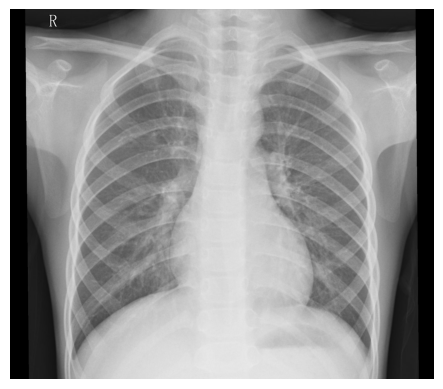

In [ ]:
#Plotting the images
for fol in os.listdir(path):
    print(fol)
    for fol2 in os.listdir(os.path.join(path,fol)):
        print("--->",fol2)
        for fol3 in os.listdir(os.path.join(path,fol,fol2)):
            print("------>",fol3)
            img = os.path.join(path,fol,fol2,fol3)
            img = cv.imread(img)
            img = cv.cvtColor(img , cv.COLOR_BGR2RGB)
            
            plt.imshow(img)
            plt.axis('off')
            plt.show()
    break 

In [ ]:
h,w=224,224
b_size=64



 Using data generator to load the data in batches instead of loading it all at once causing a crash, it takes in the following params

In [ ]:

data_datagen = dag(rescale = 1./255)
train_generation = data_datagen.flow_from_directory(
    df_train,
    target_size = (h,w),
    batch_size = b_size,
    class_mode = 'binary',
    color_mode = 'grayscale'
)

test_generation = data_datagen.flow_from_directory(
    df_test,
    target_size = (h,w),
    batch_size = b_size,
    class_mode = 'binary',
    color_mode = 'grayscale',
    shuffle = False
)

Found 40 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [ ]:
train_generation.class_indices


{'NORMAL': 0, 'PNEUMONIA': 1}

In [ ]:
test_generation.class_indices


{'NORMAL': 0, 'PNEUMONIA': 1}

In [ ]:
# Building the CNN model from ground up
model = Sequential([
    Conv2D(32 , (3,3) , activation = 'relu' , input_shape = (h , w , 1)),
    MaxPooling2D((2,2)),
    
    Conv2D(64 , (3,3) , activation='relu'),
    MaxPooling2D((2,2)),
    Dropout(.5),
    
    Conv2D(128 , (3,3) , activation = 'relu'),
    MaxPooling2D((2,2)),
    
    Conv2D(256 , (3,3) ,activation = 'relu'),
    MaxPooling2D((2,2)),
    Dropout(.5),
    
    Flatten(),
    Dense(128 , activation = 'relu'),
    Dense(1 , activation = 'sigmoid')
])

In [ ]:
model.compile(optimizer = 'adam' , loss = 'binary_crossentropy' , metrics = ['accuracy'])
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36864)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,718,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,106,689 (19.48 MB)

 Trainable params: 5,106,689 (19.48 MB)

 Non-trainable params: 0 (0.00 B)

Lets test with 15 for now, the CNN is showing to have a momentum(backand forth of the global minima) here I tested out with early stopping and without it, seems to work without it as I got a better train and validation accuracy when I left the model to run for 15 epochs. It seems to be the sweetspot for this set.
NB: References from Kaggle notebooks trying to slove the problem has been used to build the CNN.


In [ ]:
epochs = 15 # lets teast with 15 for now, the CNN is showing to have a momentum(backand forth of the global minima) here I tested out with early stopping and without it, seems to work without it as I got a better train and validation accuracy when I left the model to run for 15 epochs. It seems to be the sweetspot for this set
earlystop = EarlyStopping(patience = 5)

history = model.fit(
    train_generation ,
    epochs = epochs ,
    batch_size = b_size,
    validation_data = test_generation,
    # callbacks = [earlystop]
)



Epoch 1/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5000 - loss: 0.6456 - val_accuracy: 0.9500 - val_loss: 0.6695
Epoch 2/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.9500 - loss: 0.6178 - val_accuracy: 0.9750 - val_loss: 0.6637
Epoch 3/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.9500 - loss: 0.5842 - val_accuracy: 0.7750 - val_loss: 0.6523
Epoch 4/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.7750 - loss: 0.5581 - val_accuracy: 0.8500 - val_loss: 0.6351
Epoch 5/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.8500 - loss: 0.5047 - val_accuracy: 1.0000 - val_loss: 0.6040
Epoch 6/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 0.4403 - val_accuracy: 0.9750 - val_loss: 0.5568
Epoch 7/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.9750 - loss: 0.3620 - val_accuracy: 0.9750 - val_loss: 0.4878
Epoch 8/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.9750 - loss: 0.2653 - val_accuracy: 1.0000 - val_loss: 0.3960
Epoch 9/15
1/1 ━

In [ ]:
loss , accuracy = model.evaluate(test_generation)
print(f"The Loss is : {loss}")
print(f"The accuracy is : {accuracy}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 504ms/step - accuracy: 1.0000 - loss: 0.0175
The Loss is : 0.017463818192481995
The accuracy is : 1.0


In [ ]:
model_pred = model.predict(test_generation)
model_pred = (model_pred > 0.5)  

true_label = test_generation.classes


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 553ms/step


In [ ]:
confusion_matrix(true_label , model_pred)

array([[20,  0],
       [ 0, 20]])

In [ ]:
model.save('COVID-19 Xray Detection.h5')

In [ ]:
# paths just for prototyping, replace it with your own files below ⬇️
image_path_1 = "/Users/anoshandrews/Documents/Machine Learning/machine_task_StarX/task_2_image_detection/xray_dataset_covid19/test/PNEUMONIA/ryct.2020200034.fig2.jpeg" #pneumonia
image_path_2 = '/Users/anoshandrews/Documents/Machine Learning/machine_task_StarX/task_2_image_detection/xray_dataset_covid19/test/PNEUMONIA/SARS-10.1148rg.242035193-g04mr34g07a-Fig7a-day5.jpeg' #pneumonia
image_path_3 = '/Users/anoshandrews/Documents/Machine Learning/machine_task_StarX/task_2_image_detection/xray_dataset_covid19/test/NORMAL/NORMAL2-IM-0073-0001.jpeg'


print(os.getcwd())
images = [image_path_1, image_path_2, image_path_3]

for image in images:
    image_pil = Image.open(image).convert("RGB")

    image_np = tf.keras.utils.img_to_array(image_pil)

    img_gray = cv.cvtColor(image_np, cv.COLOR_RGB2GRAY)

    img_resized = cv.resize(img_gray, (224, 224))

    img_norm = img_resized / 255.0

    img_input = img_norm.reshape(1, 224, 224, 1)

    predict = model.predict(img_input)[0][0]
    print(predict)

    if predict >= .5:
        pred = "PNEUMONIA"
            
        print('Case detected is" **' + pred +'**')
        print('With accuracy of **{:.2f}%**'.format(100 * predict))
    else:
        pred = "NORMAL"
        print('Case detected is" **' + pred +'**')
        print('With accuracy of **{:.2f}%**'.format(100 * (1 - predict)))



/Users/anoshandrews/Documents/Machine Learning/machine_task_StarX/task_2_image_detection
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
0.99982774
Case detected is" **PNEUMONIA**
With accuracy of **99.98%**
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
0.9998557
Case detected is" **PNEUMONIA**
With accuracy of **99.99%**
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
0.119296074
Case detected is" **NORMAL**
With accuracy of **88.07%**


Model predicted the 3 test cases as True, completing the model training and saved the model for implementing the Stramlit app